In [6]:
import pandas as pd


In [7]:
df = pd.read_csv(r"segmentations.csv",sep=";",index_col=0)
df=df.replace(",",".",regex=True)

In [8]:
df.head()

,Class,AngleCh1,AngleStatusCh1,AreaCh1,AreaStatusCh1,AvgIntenCh1,AvgIntenCh2,AvgIntenCh3,AvgIntenCh4,AvgIntenStatusCh1,...,VarIntenCh1,VarIntenCh3,VarIntenCh4,VarIntenStatusCh1,VarIntenStatusCh3,VarIntenStatusCh4,WidthCh1,WidthStatusCh1,XCentroid,YCentroid
Cell,,,,,,,,,,,,,,,,,,,,,
207932307,PS,133.752036738381,0,819,1,31.923273657289,205.878516624041,69.9168797953964,164.153452685422,0,...,18.8092251818892,56.7153524052215,118.388138714715,0,0,0,32.1612612689832,1,215,347
207932463,WS,106.646387269631,0,431,0,28.0388349514563,115.315533980583,63.9417475728155,106.696601941748,0,...,17.2956430509413,37.6710533054249,49.4705236165922,0,0,0,21.1855251610911,0,371,252
207932470,PS,69.1503248054558,0,298,0,19.4561403508772,101.294736842105,28.2175438596491,31.0280701754386,0,...,13.8189676099506,30.0056434622124,24.7495366207621,0,0,2,13.3928295377181,0,487,295
207932484,WS,109.416426339951,0,256,0,18.8285714285714,125.938775510204,13.6,46.8,0,...,13.9229365891433,18.6430268191512,40.3317467501516,0,0,2,17.546861208011,0,211,495
207932459,PS,104.278653971599,0,258,0,17.5708502024291,124.368421052632,22.4615384615385,71.2064777327935,0,...,12.3249705588758,17.7471426240211,41.9285332602849,0,0,2,17.6603386215061,0,172,207


In [9]:
X = df.iloc[:,1:]
dum_x=pd.get_dummies(X, drop_first=True)
y=df.iloc[:,0]
dum_y=pd.get_dummies(y, drop_first=True)

In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [13]:
X_train, X_test, y_train, y_test = train_test_split(dum_x, dum_y, test_size = 0.3, 
                                                    random_state=42)

In [14]:
svm=SVC(kernel='linear')
svm1=svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)

C:\Users\pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[165  33]
 [ 33  72]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       198
           1       0.69      0.69      0.69       105

   micro avg       0.78      0.78      0.78       303
   macro avg       0.76      0.76      0.76       303
weighted avg       0.78      0.78      0.78       303

0.7821782178217822


In [16]:
# Import necessary modules
from sklearn.metrics import roc_curve, roc_auc_score

## Compute predicted probabilities: y_pred_prob
#y_pred_prob = svm.predict_proba(X_test)[:,1]

In [17]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)


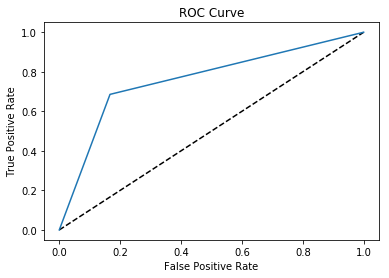

0.7595238095238096

In [19]:
# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
roc_auc_score(y_test, y_pred)
